# **L-layer Deep Neural Network : Cat Image Classification**

<img src="https://raw.githubusercontent.com/ahsan-83/Machine-Learning-Projects/main/L-layer%20Deep%20Neural%20Network/images/deep_neural_network.jpg" width="800"/>

---

# **Introduction**

L-layer Deep Neural Netrwork Logistic Regression Model is developed from scratch with python for Cat vs non-cat image classification.

## Notebook Contents

- [Packages](#section1)
- [L-layer Deep Neural Network Model Architecture](#section2)
- [L-layer Deep Neural Network Model Implementation](#section3)
- [Cat Image Dataset](#section4)
- [Model Training](#section5)
- [Model Evaluation](#section6)

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).

<a name='section1'></a>
#Packages
 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [h5py](http://www.h5py.org/) is a common package to interact with a dataset that is stored on an H5 file.

In [106]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name='section2'></a>
# **L-layer Deep Neural Network Model Architecture**

- Initialize weight and bias parameters for $L$-layer deep neural network
- Compute Linear Forward Activation *LINEAR->RELU* for $L-1$ layers and *LINEAR->SIGMOID* for last layer
- Compute the loss with Binary Cross Entropy cost function
- Compute gradients of loss function respect to parameters of hidden layers in Linear Backward Activation 
- Update hidden layer parameters for gradient descent using learning rate

<img src="https://raw.githubusercontent.com/ahsan-83/Machine-Learning-Projects/main/L-layer%20Deep%20Neural%20Network/images/model_architecture.png" width="800">


L-layer neural network parameter and activation shape in hidden layers for input $X$ as $(12288, 209)$ for $m=209$ examples

<table style="width:100%">
    <tr>
        <td>  </td> 
        <td> Shape of W </td> 
        <td> Shape of b  </td> 
        <td> Activation </td>
        <td> Shape of Activation </td> 
    <tr>
    <tr>
        <td> Layer 1 </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
        <td> $(n^{[1]},209)$ </td> 
    <tr>
    <tr>
        <td> Layer 2 </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>
       <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>
   <tr>
        <td> Layer L-1 </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
    <tr>
   <tr>
        <td> Layer L </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>
</table>

<a name='section3'></a>
# **L-layer Deep Neural Network Model Implementation**

## Initialize Parameters

Parameter initialization (Weights and Biases) for L-layer neural network implemented in `initialize_parameters_deep`

- Random initialization of weights using `np.random.randn(shape) * 0.01`
- Zeros initialization of biases using `np.zeros(shape)`

In [77]:
def initialize_parameters_deep(layer_dims):
    
    np.random.seed(3)
    parameters = {}
    
    # number of layers in the network
    layers = len(layer_dims)            

    for l in range(1, layers):

        # initialize weights with random value * 0.01
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.01
        
        # initialize biases with zero
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
    return parameters

## Forward Propagation

### Linear Forward 
Linear Forward computes the equation $Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$ in `linear_forward` where $A^{[0]} = X$.  

In [78]:
def linear_forward(A, W, b):
    
    Z = np.dot(W,A) + b
    cache = (A, W, b)
    
    return Z, cache

### Linear Activation Forward

Linear Activation Forwad computes activation function of Linear Forward in *LINEAR->ACTIVATION* layer <br/><br/> $$A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$$

Two activation functions are implemented

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. 
``` python
A, cache = sigmoid(Z)
```

- **ReLU**: $A = RELU(Z) = max(0, Z)$. 
``` python
A, cache = relu(Z)
```

In [79]:
def sigmoid(Z):
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache
    
def relu(Z):
    
    A = np.maximum(0,Z)    
    cache = Z 
    
    return A, cache

def linear_activation_forward(A_prev, W, b, activation):
    
    # compute linear forward 
    Z, linear_cache = linear_forward(A_prev, W, b)
    
    # compute linear forward activation based on activation function sigmoid or relu
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        A, activation_cache = relu(Z) 
    
    cache = (linear_cache, activation_cache)

    return A, cache

### L-layer Model Forward

L-layer Model Forward Propagation involves *LINEAR->RELU* activation in  $L-1$ layers and *LINEAR->SIGMOID* activation in last layer as implemented in `L_model_forward`

Forward Propagation prediction output $\hat{Y}$ is denoted as **`AL`** $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$

<img src="https://raw.githubusercontent.com/ahsan-83/Machine-Learning-Projects/main/L-layer%20Deep%20Neural%20Network/images/forward_propagation.png" width="800">

In [84]:
def L_model_forward(X, parameters):
  
    caches = []
    A = X
    
    # number of layers in neural network
    layers = len(parameters) // 2                 
    
    # Compute [LINEAR -> RELU] for L-1 layers
    for l in range(1, layers):
        
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Compute LINEAR -> SIGMOID for last layer
    AL, cache = linear_activation_forward(A, parameters['W' + str(layers)], parameters['b' + str(layers)], activation = "sigmoid")
    caches.append(cache)

    return AL, caches

## Cost Function

Forward Propagation prediction output is evaluated using binary cross entropy cost function formula as implemented in `compute_cost`

$$ J = -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$

In [85]:
def compute_cost(AL, Y):
    
    # training dataset count
    m = Y.shape[1]

    # compute binary cross entropy cost from forward propagation output AL and actual result Y
    cost = (1./m) * (-np.dot(Y, np.log(AL).T) - np.dot((1-Y), np.log(1-AL).T))
    
    cost = np.squeeze(cost) 
    
    return cost

## Backward Propagation

Backward Propagation computes gradients of the loss function with respect to the parameters. 

<img src="https://raw.githubusercontent.com/ahsan-83/Machine-Learning-Projects/main/L-layer%20Deep%20Neural%20Network/images/backward_propagation.png" width="700">

### Linear Backward

Linear Backward computes  $dW^{[l]}, db^{[l]}, dA^{[l-1]}$ from Linear Forward equation $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ <br/> assuming $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$ is already computed for layer $l$

<img src="https://raw.githubusercontent.com/ahsan-83/Machine-Learning-Projects/main/L-layer%20Deep%20Neural%20Network/images/linear_backward_propagation.png" width="400">

$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}$$


In [86]:
def linear_backward(dZ, cache):
    
    # previous layer activation, current layer weight and bias restore from cache
    A_prev, W, b = cache

    # training dataset count
    m = A_prev.shape[1]

    # compute weight, bias and previous layer activation gradient according to equations
    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

### Linear Activation Backward

Linear Activation Backward computes gradient $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}} = dA^{[l]} * g'(Z^{[l]})$ from Linear Activation Forward equarion $A^{[l]} = g(Z^{[l]})$

Gradient $dZ^{[l]}$ computed for different activation function is used to get $dW^{[l]}, db^{[l]}, dA^{[l-1]}$ from `linear_backward` function

**`sigmoid_backward`** and **`relu_backward`** computes $dZ^{[l]}$ for Sigmoid and RELU activation function

In [87]:
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True)
    
    # dZ = 0 when Z <= 0 
    dZ[Z <= 0] = 0
    
    return dZ

def sigmoid_backward(dA, cache):
  
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    return dZ

def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    
    # compute gradient dZ based on activation function
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    
    # compute dA_prev, dW, db from linear_backward with dZ
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

### L-layer Model Backward 

`L_model_backward` computes gradients of loss function respect to parameters in each hidden layer of deep neural network backward. 

<img src="https://raw.githubusercontent.com/ahsan-83/Machine-Learning-Projects/main/L-layer%20Deep%20Neural%20Network/images/backward_propagation_layers.png" width="500">

At first, derivative of loss function respect to prediction **`dAL`** is computed with equation 

$$ \frac{\partial \mathcal{L} }{\partial a} = -\frac{y}{a} + \frac{(1-y)}{(1-a)}$$

- $dW^{[L]}, db^{[L]}, dA^{[L-1]}$ are computed from **`dAL`** for *LINEAR->SIGMOID* layer using `linear_activation_backward`

- $dW^{[l]}, db^{[l]}, dA^{[l-1]}$ are computed from $dA^{[l]}$ for *LINEAR->RELU* $L-1$ layers using `linear_activation_backward`

In [88]:
def L_model_backward(AL, Y, caches):

    grads = {}
    
    layers = len(caches)

    # training dataset count
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    # compute gradient of loss function respect to prediction according to equation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # compute dA, dW, db for sigmoid activation layer and store gradients
    current_cache = caches[layers-1] # Last Layer
    grads["dA" + str(layers-1)], grads["dW" + str(layers)], grads["db" + str(layers)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    # compute dA, dW, db for L-1 relu activation layers and store gradients
    for l in reversed(range(layers-1)):
      
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")

        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

### Parameter Update

Neural network parameters are updated from gradients as follows

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

Learning rate $\alpha$ updates parameters $W^{[l]}$ and $b^{[l]}$ for gradient descent in every layer $l$

In [89]:
def update_parameters(parameters, grads, learning_rate):
    
    layers = len(parameters) // 2 

    # update parameters in every hidden layer according to equations
    for l in range(layers):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

## L-layer Deep Neural Network Model 

Neural network model is developed by stacking above steps

1. Initialize Parameters
2. Loop for number of iterations
  - Forward Propagation
  - Compute Cost
  - Backward Propagation
  - Parameter Update
3. Predict output with trained parameters 

**`L_layer_model`** trains L-layer neural network with labeled dataset (X,Y) and output hidden layer parameters

In [98]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
  
    np.random.seed(42)

    # store cost of each iteration 
    costs = []                       
    
    # initialize parameters for hidden layers
    parameters = initialize_parameters_deep(layers_dims)
    
    # gradient descent iteration
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost using binary cross entropy loss function
        cost = compute_cost(AL, Y)
    
        # Backward propagation
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # store cost for every 100 iteration
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
        costs.append(cost)
            
    return parameters, costs

## L-layer Deep Neural Network Model Prediction

After training model with train dataset we get trained parameters for hidden layer units. <br/>

Model prediction evaluated for test dataset using model parameters in `L_model_forward` as implemented in `L_layer_model_prediction`

- Loss is calculated from model prediciton with `compute_cost` function
- Accuracy is calculated from model prediciton with equation

$$ Accuracy = \frac{1}{m} \sum\limits_{i = 1}^{m} (\hat Y^{(i)} == Y^{(i)})$$

- Precision, Recall and F1 Score is calculated from model prediciton with equations

$$ Precision = \frac{True Positive}{(True Positive + False Positive)}$$
<br/>
$$ Recall = \frac{True Positive}{(True Positive + False Negative)}$$
<br/>
$$ F1 Score = \frac{2 \times Precision \times Recall}{(Precision + Recall)}$$


In [116]:
def L_layer_model_prediction(test_x, test_y, parameters):
    
    # Classification probability threshold
    threshold = 0.5

    # dataset size
    m = test_x.shape[1]

    # number of layers
    n = len(parameters)

    # test dataset model prediction array 
    prediction = np.zeros((1,m))
    
    # Linear Forward Propagation with trained parameters and test dataset
    prob, caches = L_model_forward(test_x, parameters)


    # generate binary prediction from model probability output based on threshold
    prediction = (prob >= threshold).astype("int32") 
    
    true_positive, false_positive, true_negative, false_negative = 0, 0, 0, 0

    for i in range(m):
        if (prediction[0,i] == 1) & (test_y[0,i] == 1):
          true_positive += 1
        elif (prediction[0,i] == 1) & (test_y[0,i] == 0):
          false_positive += 1
        elif (prediction[0,i] == 0) & (test_y[0,i] == 0):
          true_negative += 1
        else:
          false_negative += 1

    # compute model accuracy, precision, recall and f1 score from TP, FP, TN, FN
    accuracy = (true_positive + true_negative) / m
    precision = true_positive / (true_positive + false_positive) 
    recall    = true_positive / (true_positive + false_negative) 
    f1_score  = (2 * precision * recall) / (precision + recall)

    return prediction, accuracy, precision, recall, f1_score

<a name='section4'></a>
# **Cat Image Dataset**

"Cat vs non-Cat" dataset stored as `train_catvnoncat.h5` and `test_catvnoncat.h5` contains 64 x 64 dimension labelled images.

Image shape : (64, 64, 3)

## Load Data


In [91]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [92]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()


print ("Number of training examples: " + str(train_x_orig.shape[0]))
print ("Number of testing examples: " + str(test_x_orig.shape[0]))
print ("Image Shape: " + str(train_x_orig.shape))

Number of training examples: 209
Number of testing examples: 50
Image Shape: (209, 64, 64, 3)


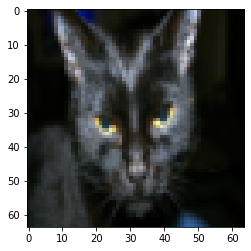

In [ ]:
index = 25
plt.imshow(train_x_orig[index])

Reshape train and test image dataset before training model

<img src="https://raw.githubusercontent.com/ahsan-83/Machine-Learning-Projects/main/L-layer%20Deep%20Neural%20Network/images/cat_image_reshape.png"/>

In [93]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

Normalize image data to have feature values in range [0,1]

In [94]:
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


<a name='section5'></a>
# **Model Training**

L-layer Deep Neural Network Logistic Regression Model contains multiple layers for Cat Image Classification.

Model contains 3 hidden layers with [20, 7, 5] units, input layer with 12288 units as flattened image size and output layer with 1 unit.

- Learning Rate = 0.0075
- Optimization Algo = Gradient Discent
- Loss = Binary Crossentropy
- Model Training Iteration = 3000


In [110]:
layers_dims = [12288, 20, 7, 5, 1]
learning_rate = 0.0075

parameters, costs = L_layer_model(train_x, train_y, layers_dims, learning_rate = learning_rate, num_iterations = 3000)
print('Model Training Complete')


Model Training Complete


### Model Training Accuracy and Loss

Training accuracy and loss of L-layer deep neural network model

Model training accuracy :  99.04306220095694


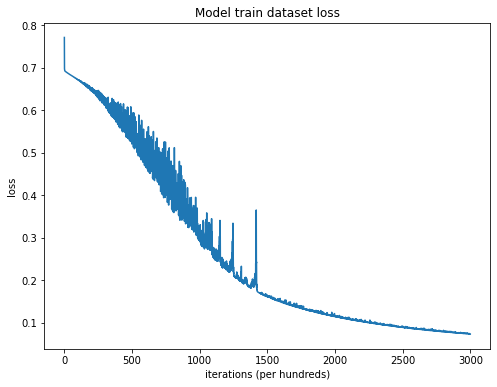

In [112]:
_, accuracy, _, _, _ = L_layer_model_prediction(train_x, train_y, parameters)
print('Model training accuracy : ', accuracy * 100)

# plot loss of the model for train dataset
plt.plot(np.squeeze(costs))
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.title("Model train dataset loss")
plt.show()



<a name='section6'></a>
# **Model Evaluation**

Cat vs non-cat classification model is evaluated by computing Accuracy, Precision, Recall, F1 Score for test dataset from `L_layer_model_prediction`

In [117]:
_, test_accuracy, test_precision, test_recall, test_f1_score = L_layer_model_prediction(test_x, test_y, parameters)

print('Model Test Accuracy : ', test_accuracy * 100)
print('Model Test Precision : ', test_precision)
print('Model Test Recall : ', test_recall)
print('Model Test F1 Score : ', test_f1_score * 100)


Model Test Accuracy :  82.0
Model Test Precision :  0.8157894736842105
Model Test Recall :  0.9393939393939394
Model Test F1 Score :  87.32394366197182


Cat vs non-cat classification model achieved 82% accuracy and 0.87 F1 Score